### 1. Importing the relevant libraries

In [361]:
# CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [362]:
# CODE HERE
data = pd.read_csv('linear.csv')

#### Let's explore the top 5 rows of the df


In [363]:
# CODE HERE
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Let's explore the datatype of each column


In [364]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

#### `numerical variables`

In [365]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `categorical variables`

In [366]:
# CODE HERE
data.describe(include='object')

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

#### `number of missing values in column`

In [367]:
# CODE HERE
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### `percentages of missing values in column`

In [368]:
# CODE HERE
(data.isnull().sum() / data.shape[0] ) * 100

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [369]:
data.dropna(axis = 0,how='any',inplace=True)  # delete row which contain null values

In [370]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 6. Let's check the descriptives without the missing values


In [371]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `Both the columns that have missing values are of numerical datatype`

### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

### Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

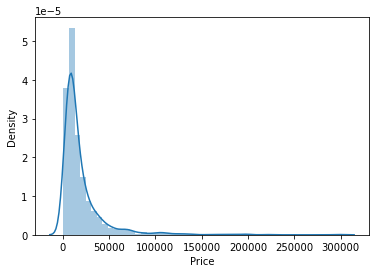

In [372]:
sns.distplot(data['Price'])

### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

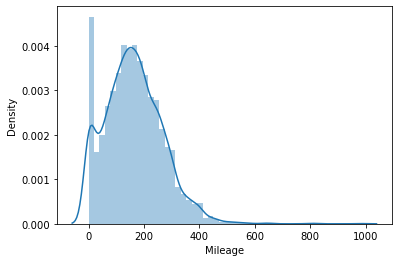

In [373]:
sns.distplot(data['Mileage'])

### EngineV

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

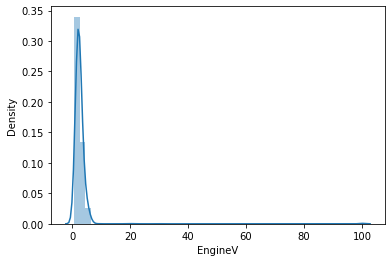

In [374]:
sns.distplot(data['EngineV'])

### Dealing with outliers
Hint: **Use IQR or Z Score**

### `I am using IQR technique below but will also try z technique at the end `

#### 8A. Identify the Outliers which are presented in `Price` Column

<AxesSubplot:xlabel='Price'>

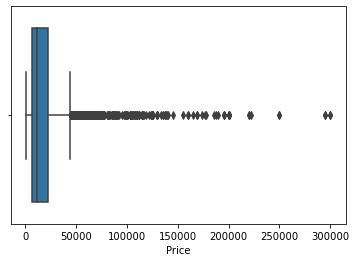

In [375]:
# CODE HERE
sns.boxplot(data['Price'])

In [376]:
q1=np.percentile(data['Price'],25)
q3=np.percentile(data['Price'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-15352.5 and Upper Bound:44251.5


In [377]:
data[data['Price'] > upper_bound]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016,X5
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015,X5 M
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006,S 350
...,...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016,Q7
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011,X6


#### 8B. Remove the Outliers which are presented in `Price` Column

In [378]:
# CODE HERE
data = data[data['Price'] <= upper_bound]   # remove outliers
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

<AxesSubplot:xlabel='Price', ylabel='Density'>

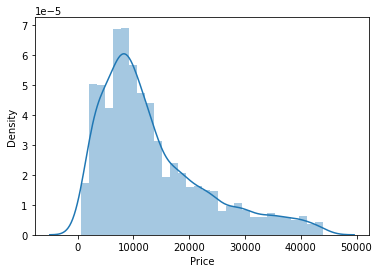

In [379]:
# CODE HERE
sns.distplot(data['Price'])

#### 9A. Same identify and remove the outliers in `Milage` column

<AxesSubplot:xlabel='Mileage'>

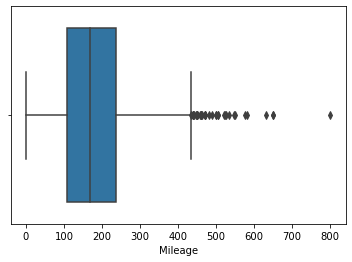

In [380]:
# CODE HERE
sns.boxplot(data['Mileage'])

In [381]:
q1=np.percentile(data['Mileage'],25)
q3=np.percentile(data['Mileage'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-87.0 and Upper Bound:433.0


In [382]:
data[data['Mileage'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991,Passat B3
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000,Master
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985,190
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998,T4 (Transporter)


In [383]:
# CODE HERE
data = data[data['Mileage'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

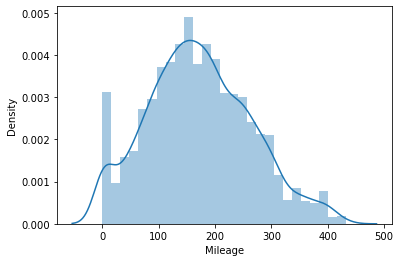

In [384]:
# CODE HERE
sns.distplot(data['Mileage'])

### `Now this variable is Normally Distributed`

#### 10A. Identify and remove the outliers from `EngineV` column



<AxesSubplot:xlabel='EngineV'>

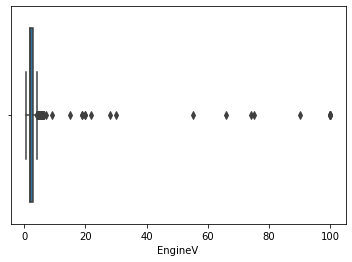

In [385]:
# CODE HERE
# CODE HERE
sns.boxplot(data['EngineV'])

In [386]:
# CODE HERE
q1=np.percentile(data['EngineV'],25)
q3=np.percentile(data['EngineV'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:0.3000000000000005 and Upper Bound:4.299999999999999


In [387]:
data[data['EngineV'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
14,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008,S 500
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001,S 500


In [388]:
# CODE HERE
data = data[data['EngineV'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19
12,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,A6 Allroad


#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

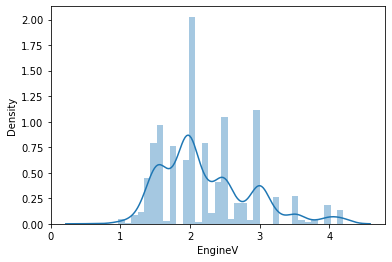

In [389]:
# CODE HERE
sns.distplot(data['EngineV'])

### `Now this variable is near to Normally distributed`

#### 10C. Perform Label & One-Hot Encoding For the Categorical Variable

### `Label Encoding`:

#### `Registration`

In [390]:
label_encoder = {"yes":1,"no":0}
data["Registration_encoded"] = data["Registration"].apply(lambda x: label_encoder[x] if x in label_encoder else 2)
data.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Registration_encoded
3445,Volkswagen,1500.0,sedan,265,1.8,Petrol,yes,1988,Jetta,1
2277,Toyota,17500.0,hatch,45,1.6,Petrol,yes,2014,Auris,1
4209,Volkswagen,10500.0,van,299,2.5,Diesel,yes,2002,Syncro,1
226,Mercedes-Benz,9299.0,sedan,350,2.7,Diesel,yes,2000,E-Class,1
1363,Mitsubishi,9600.0,other,114,2.0,Petrol,yes,1999,Eclipse,1
887,Toyota,14100.0,hatch,67,1.6,Petrol,yes,2012,Auris,1
1038,Volkswagen,8700.0,other,357,2.5,Diesel,yes,2003,T4 (Transporter),1
1900,Mercedes-Benz,32500.0,crossover,168,3.2,Diesel,yes,2009,GL 320,1
1085,Toyota,25000.0,crossover,80,4.0,Gas,yes,2008,FJ Cruiser,1
3338,Volkswagen,8500.0,van,216,1.9,Diesel,yes,2005,Caddy,1


### `One hot Encoding`:

#### `Engine Type`

In [391]:
# Using get_dummies method in pandas
df_ohe = data.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Engine' ,columns=['Engine Type'],drop_first=False)
one_hot_1.insert(loc=2, column='Engine Type', value=data['Engine Type'].values)
one_hot_1

,Brand,Price,Engine Type,Body,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol
0,BMW,4200.0,Petrol,sedan,277,2.0,yes,1991,320,1,0,0,0,1
1,Mercedes-Benz,7900.0,Diesel,van,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0
3,Audi,23000.0,Petrol,crossover,240,4.2,yes,2007,Q7,1,0,0,0,1
4,Toyota,18300.0,Petrol,crossover,120,2.0,yes,2011,Rav 4,1,0,0,0,1
7,Audi,14200.0,Diesel,vagon,200,2.7,yes,2006,A6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,Diesel,van,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0
4339,Toyota,17900.0,Petrol,sedan,35,1.6,yes,2014,Corolla,1,0,0,0,1
4341,BMW,6500.0,Petrol,sedan,1,3.5,yes,1999,535,1,0,0,0,1
4342,BMW,8000.0,Petrol,sedan,194,2.0,yes,1985,520,1,0,0,0,1


#### `Body`

In [392]:
# Using get_dummies method in pandas
df_ohe = one_hot_1.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Body' ,columns=['Body'],drop_first=False)
one_hot_1.insert(loc=2, column='Body', value=data['Body'].values)
one_hot_1

,Brand,Price,Body,Engine Type,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,BMW,4200.0,sedan,Petrol,277,2.0,yes,1991,320,1,0,0,0,1,0,0,0,1,0,0
1,Mercedes-Benz,7900.0,van,Diesel,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0,0,0,0,0,0,1
3,Audi,23000.0,crossover,Petrol,240,4.2,yes,2007,Q7,1,0,0,0,1,1,0,0,0,0,0
4,Toyota,18300.0,crossover,Petrol,120,2.0,yes,2011,Rav 4,1,0,0,0,1,1,0,0,0,0,0
7,Audi,14200.0,vagon,Diesel,200,2.7,yes,2006,A6,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,Diesel,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0,0,0,0,0,0,1
4339,Toyota,17900.0,sedan,Petrol,35,1.6,yes,2014,Corolla,1,0,0,0,1,0,0,0,1,0,0
4341,BMW,6500.0,sedan,Petrol,1,3.5,yes,1999,535,1,0,0,0,1,0,0,0,1,0,0
4342,BMW,8000.0,sedan,Petrol,194,2.0,yes,1985,520,1,0,0,0,1,0,0,0,1,0,0


#### `dropping column because it has 247 types of values`

In [393]:
one_hot_1.dtypes

Brand                    object
Price                   float64
Body                     object
Engine Type              object
Mileage                   int64
EngineV                 float64
Registration             object
Year                      int64
Model                    object
Registration_encoded      int64
Engine_Diesel             uint8
Engine_Gas                uint8
Engine_Other              uint8
Engine_Petrol             uint8
Body_crossover            uint8
Body_hatch                uint8
Body_other                uint8
Body_sedan                uint8
Body_vagon                uint8
Body_van                  uint8
dtype: object

In [394]:
X = one_hot_1[[ 'Mileage', 'EngineV',"Price",'Year']]
y = one_hot_1['Price']

In [395]:
X.columns

Index(['Mileage', 'EngineV', 'Price', 'Year'], dtype='object')

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


In [396]:
##### Theory 

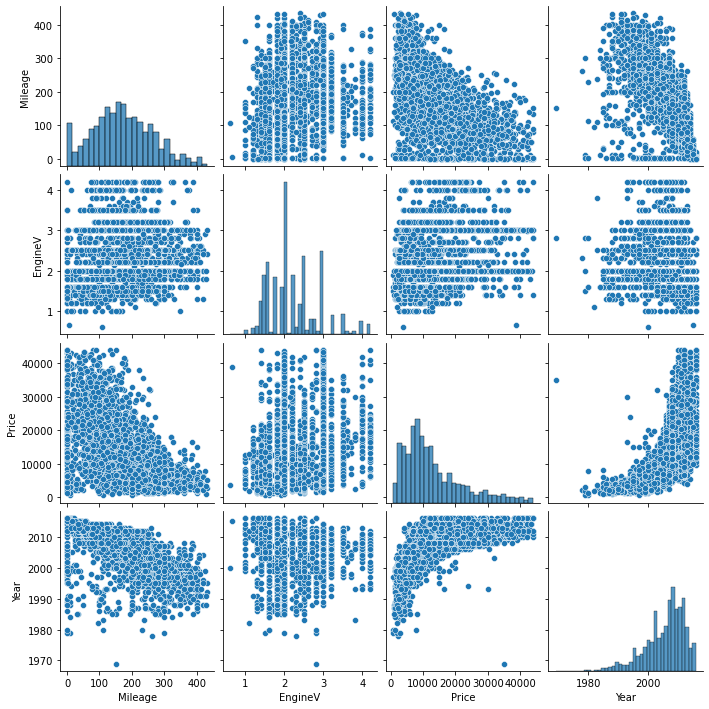

In [397]:
sns.pairplot(X)

<AxesSubplot:>

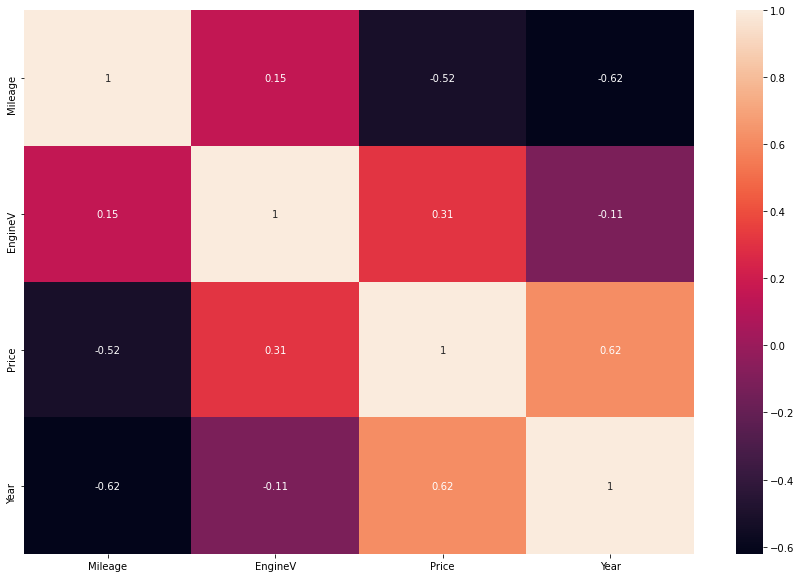

In [398]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

#### 11B. Show the variables which are having Multicollinearity.

## `Categorical Variables ( chi square )-----------------------------------`

### Brand vs Body

In [399]:
two_way_frquency=pd.crosstab(data['Brand'],data['Body'])
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

2.3108125817537855e-269

#### `Brand and Body are related`

### Brand vs EngineType

In [400]:
two_way_frquency=pd.crosstab(data['Brand'],data['Engine Type'])

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

4.428006391028606e-137

#### `Brand and Engine type are related`

### Brand vs Registration

In [401]:
two_way_frquency=pd.crosstab(data['Brand'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

9.547047723979418e-42

#### `Brand and Registration are related`

### Body vs Engine Type

In [402]:
two_way_frquency=pd.crosstab(data['Body'],data['Engine Type'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

4.65930865491815e-192

#### `bodyand Engine Type are related`

### Body vs Registration

In [403]:
two_way_frquency=pd.crosstab(data['Body'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

6.179157169957441e-30

#### `Body and Registration are related`

### Engine Type vs Registration

In [404]:
two_way_frquency=pd.crosstab(data['Engine Type'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

3.366306488717531e-22

#### `Engine Type and registration are related`

### Brand vs Model

In [405]:
two_way_frquency=pd.crosstab(data['Brand'],data['Model'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

0.0

#### `Brand and Model are related`

### `Summary of Categorical variables`
- `Brand and Body are related`
- `Brand and Engine type are related`
- `Brand and Registration are related`
- `Body and Engine Type are related`
- `Body and Registration are related`
- `Engine Type and Registration are related`

### Multicollinear variables:
#### Categorical Column:
`All categorical variables are cursed with curse of multicollinearity, so we have to check all variables one by while model  building`

## `Numerical variables ---------------------------------`

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [407]:
cal_vif(X)

,var,VIF
0,Mileage,7.126469
1,EngineV,16.458678
2,Price,5.175829
3,Year,16.558449


<AxesSubplot:>

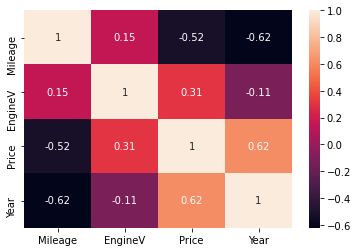

In [408]:
sns.heatmap(X.corr(),annot=True)

#### Numerical columns:
`Milage and year are multicollinear variables`

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

### `all 3 numerical variabls together`

In [409]:
import statsmodels.formula.api as smf
modelols = smf.ols(formula = 'Price~Mileage+EngineV+Registration_encoded+Engine_Diesel+Engine_Gas+Engine_Other+Engine_Petrol+Body_crossover+Body_hatch+Body_other+Body_sedan+Body_vagon+Body_van',data = one_hot_1).fit()
modelols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     346.8
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -34764.
No. Observations:                3419   AIC:                         6.955e+04
Df Residuals:                    3407   BIC:                         6.963e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3151.6662    440.158      7.160      0.000    2288.665    4014.667
Mileage                -48.1696      1.304    -36.927      0.000     -50.727     -45.612
EngineV               4203.0412    200.734     20.938      0.000    3809.470    4596.612
Registration_encoded  7361.8794    378.814     19.434      0.000    6619.153    8104.606
Engine_Diesel         3135.4152    237.076     13.225      0.000    2670.590    3600.241
Engine_Gas           -1594.5877    305.973     -5.212      0.000   -2194.496    -994.679
Engine_Other          1190.2255    541.296      2.199      0.028     128.927    2251.524
Engine_Petrol          420.6131    240.076      1.752      0.080     -50.094     891.321
Body_crossover        5035.2145    330.589     15.231      0.000    4387.042    5683.387
Body_hatch           -1510.4423    360.162     -4.194      0.000   -2216.599    -804.286
Body_other            1250.5334    329.027      3.801      0.000     605.423    1895.644
Body_sedan             665.6012    208.856      3.187      0.001     256.105    1075.097
Body_vagon            -229.1575    306.010     -0.749      0.454    -829.140     370.825
Body_van             -2060.0831    288.613     -7.138      0.000   -2625.955   -1494.211
==============================================================================
Omnibus:                      371.223   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.235
Skew:                           0.684   Prob(JB):                    6.78e-167
Kurtosis:                       4.872   Cond. No.                     2.92e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### `It is a Bad Model ----------------------- Lets do some other things to bring better accuracy`

#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

### `R Square`: 
- `R-squared (R2)`: Is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, `if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs`.
<br />

- `Here R-squared: 0.528 which means SSR/SST = 0.528 which means it is not a good fit for this model because R-square is very low`.
<br />

### ` Adjusted.R-Square`
- ` Adjusted.R-Square`: The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.
<br />

- `Here Adjusted.R-squared: 0.527`.
- Same R Square and adjusted.R-Square means that the variables taken taken to fit line are actually not casusing any unnecessary damage as The adjusted R2 will penalize you for adding independent variables that do not fit the model.

<br />

###  `P-value`
- `P-value`: Same as in Hypothesis testing P-value less then 0.05 means we can reject our null hypothesis, or in other words these variables are not related and can be used to predict dependent variable

#### 13A. Feature Selection using with Forward Selection

### `Numerical columns ---------------------------`

## `Iteratively all variables are taken` 

#### `one variable`

In [410]:
for col in ['Mileage','EngineV','Year']:
    print(f"results for formula = Price~{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~Mileage
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     1241.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          3.91e-232
Time:                        17:55:11   Log-Likelihood:                -35518.
No. Observations:                3419   AIC:                         7.104e+04
Df Residuals:                    3417   BIC:                         7.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

#### `two variable`

In [411]:
X = data[['Mileage','EngineV']]
cal_vif(X)

,var,VIF
0,Mileage,3.988349
1,EngineV,3.988349


In [412]:
X = data[['Mileage','Year']]
cal_vif(X)

,var,VIF
0,Mileage,4.428796
1,Year,4.428796


In [413]:
for col in ['EngineV','Year']:
    print(f"results for formula = Price~Mileage+{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~Mileage+{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~Mileage+EngineV
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -35105.
No. Observations:                3419   AIC:                         7.022e+04
Df Residuals:                    3416   BIC:                         7.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [414]:
X = data[['EngineV','Year']]
cal_vif(X)

,var,VIF
0,EngineV,12.628022
1,Year,12.628022


In [415]:
X = data[['Mileage','EngineV']]
cal_vif(X)

,var,VIF
0,Mileage,3.988349
1,EngineV,3.988349


In [416]:
for col in ['Mileage','Year']:
    print(f"results for formula = Price~EngineV+{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~EngineV+{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~EngineV+Mileage
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -35105.
No. Observations:                3419   AIC:                         7.022e+04
Df Residuals:                    3416   BIC:                         7.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [417]:
X = data[['Mileage','Year']]
cal_vif(X_21)

,var,VIF
0,Mileage,4.428796
1,Year,4.428796


In [418]:
X= data[['EngineV','Year']]
cal_vif(X_22)

,var,VIF
0,EngineV,12.628022
1,Year,12.628022


In [419]:
for col in ['Mileage','EngineV']:
    print(f"results for formula = Price~Year+{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~Year+{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~Year+Mileage
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1197.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -35140.
No. Observations:                3419   AIC:                         7.029e+04
Df Residuals:                    3416   BIC:                         7.030e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

#### `three variable`

In [420]:
X_all = data[['Mileage','EngineV','Year']]
cal_vif(X_all)

,var,VIF
0,Mileage,4.543781
1,EngineV,12.955885
2,Year,14.386646


In [421]:
print(f"results for formula = Price~Mileage+EngineV+Year")
print("----------------------------------------")
print("----------------------------------------")
results = smf.ols(f"Price~Mileage+EngineV+Year",data=one_hot_1).fit()
print(results.summary(), end="\n\n")

results for formula = Price~Mileage+EngineV+Year
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:11   Log-Likelihood:                -34583.
No. Observations:                3419   AIC:                         6.917e+04
Df Residuals:                    3415   BIC:                         6.920e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


### `Above chi square test results for Categorical Columns ----------------------`

### `Summary of Categorical variables`
- `Brand and Body are related`
- `Brand and Engine type are related`
- `Brand and Registration are related`
- `Body and Engine Type are related`
- `Body and Registration are related`
- `Engine Type and Registration are related`
### too much multicollinearity is there, `so check one by one`

### `Check models one by one to find best variables -----------------------------`

In [422]:
X_final_1 = one_hot_1[['Mileage','EngineV','Year','Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol']]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model = LinearRegression()
model.fit(X_final_1,y)
y_pred = model.predict(X_final_1)
print(f"R2_scores {r2_score(y,y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y,y_pred))}")

R2_scores 0.5783816318476177
RMSE 5958.95991950929


In [423]:
X_final_2 = one_hot_1[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van']]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_final_2,y)
y_pred = model.predict(X_final_2)
print(f"R2_scores {r2_score(y,y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y,y_pred))}")

R2_scores 0.6037164070891838
RMSE 5777.151395369164


In [424]:
X_final_3 = one_hot_1[['Mileage','EngineV','Year','Registration_encoded']]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_final_3,y)
y_pred = model.predict(X_final_3)
print(f"R2_scores {r2_score(y,y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y,y_pred))}")

R2_scores 0.6034115210582685
RMSE 5779.37333205394


---

- Mileage
- EngineV
- Year
- Body_crossover
- Body_hatch
- Body_other
- Body_sedan
- Body_vagon
- Body_van
### Are proved to be best features for prediction

#### 13B. Feature Selection using with Backward Selection

### `Backward Elimination`

### 3 variables

In [425]:
X = data[['Mileage','EngineV','Year']]
cal_vif(X)

,var,VIF
0,Mileage,4.543781
1,EngineV,12.955885
2,Year,14.386646


In [426]:
print(f"results for formula = Price~Mileage+EngineV+Year")
print("----------------------------------------")
print("----------------------------------------")
results = smf.ols(f"Price~Mileage+EngineV+Year",data=one_hot_1).fit()
print(results.summary(), end="\n\n")

results for formula = Price~Mileage+EngineV+Year
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:12   Log-Likelihood:                -34583.
No. Observations:                3419   AIC:                         6.917e+04
Df Residuals:                    3415   BIC:                         6.920e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


### 2 variables

In [427]:
X = data[['Mileage','Year']] 
cal_vif(X)

,var,VIF
0,Mileage,4.428796
1,Year,4.428796


In [428]:
X = data[['Mileage','EngineV']]
cal_vif(X)

,var,VIF
0,Mileage,3.988349
1,EngineV,3.988349


In [429]:
for col in ['EngineV','Year']:
    print(f"results for formula = Price~Mileage+{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~Mileage+{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~Mileage+EngineV
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:12   Log-Likelihood:                -35105.
No. Observations:                3419   AIC:                         7.022e+04
Df Residuals:                    3416   BIC:                         7.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [430]:
X = data[['Mileage','Year']] 
cal_vif(X)

,var,VIF
0,Mileage,4.428796
1,Year,4.428796


In [431]:
X = data[['Mileage','EngineV']]
cal_vif(X)

,var,VIF
0,Mileage,3.988349
1,EngineV,3.988349


In [432]:
for col in ['EngineV','Year']:
    print(f"results for formula = Price~Mileage+{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~Mileage+{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~Mileage+EngineV
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:12   Log-Likelihood:                -35105.
No. Observations:                3419   AIC:                         7.022e+04
Df Residuals:                    3416   BIC:                         7.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

In [433]:
X = data[['Year','Mileage']] 
cal_vif(X)

,var,VIF
0,Year,4.428796
1,Mileage,4.428796


In [434]:
X = data[['Year','EngineV']] 
cal_vif(X)

,var,VIF
0,Year,12.628022
1,EngineV,12.628022


In [435]:
for col in ['Mileage','EngineV']:
    print(f"results for formula = Price~Year+{col}")
    print("----------------------------------------")
    print("----------------------------------------")
    results = smf.ols(f"Price~Year+{col}",data=one_hot_1).fit()
    print(results.summary(), end="\n\n")

results for formula = Price~Year+Mileage
----------------------------------------
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1197.
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:55:12   Log-Likelihood:                -35140.
No. Observations:                3419   AIC:                         7.029e+04
Df Residuals:                    3416   BIC:                         7.030e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

#### `EngineV and Mileage are found to be the useful variables among numerical`

### From the above all categorical are effected with the curse of multicollinearity so we ahve to check each column one by one

### Engine

In [436]:
X_final_1 = one_hot_1[['Mileage','EngineV','Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol']]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model = LinearRegression()
model.fit(X_final_1,y)
y_pred = model.predict(X_final_1)
print(f"R2_scores {r2_score(y,y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y,y_pred))}")

R2_scores 0.4377088996416246
RMSE 6881.629829261277


### Body

In [437]:
X_final_2 = one_hot_1[['Mileage','EngineV','Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van']]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_final_2,y)
y_pred = model.predict(X_final_2)
print(f"R2_scores {r2_score(y,y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y,y_pred))}")

R2_scores 0.4594047169423787
RMSE 6747.561146111723


### Registration

In [438]:
X_final_3 = one_hot_1[['Mileage','EngineV','Registration_encoded']]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_final_3,y)
y_pred = model.predict(X_final_3)
print(f"R2_scores {r2_score(y,y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y,y_pred))}")

R2_scores 0.468337671820764
RMSE 6691.579579942684


In [439]:
###Interpretations

#### 14. Explain about Assumption of errors and predictors


In [440]:
###CODEHERE

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [441]:
###CODEHERE

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [442]:
###CODEHERE

#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [443]:
###CODEHERE

#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [444]:
###CODEHERE

#### 16. Perform Residual Analysis Give The Interpretations.

In [445]:
###CODEHERE

### Give the Conclusions about the Model fits for What you Observe.

In [446]:
### Interpretations